In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\eren\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
df = pd.read_csv("veri_5k.csv", header=None, names=["review"])

In [7]:
df

,review
review,game_name
"2023 So Elden Ring is my first souls-like game that i have ever gotten 100% achievements...AND IT WAS AMAZING!!! this is the best game i have ever played and i loved every minute of playing it! the story the world the characters I LOVED ALL OF IT! i felt like a kid in a candyshop except the storeowner and everyone in the shop is trying to kill me as i keep dodging them trying to steal candy for myself giggling wildly to myself as i have gone mad from being touched by a giant burned and smoldering hand that only has three fingers, but hey at least i get some awesome looking eyes! so yeah i can't wait for the dlc to come out! this game get's a golden 10/10 from me!",ELDEN RING
"Blood, Guts, Friends what more can a Guy ask for Really.","Warhammer 40,000: Space Marine 2"
2014 One of the best game which i have ever played :'D,Counter-Strike 2
FOR THE EMPEROR,"Warhammer 40,000: Space Marine 2"
...,...
Game of the year.,Black Myth: Wukong
"*Black Myth: Wukong* is nothing short of a masterpiece in the action RPG genre. From the moment you step into its world, you're captivated by the stunning visuals that bring ancient Chinese mythology to life in ways rarely seen in gaming. The combat is incredibly fluid and satisfying, demanding both strategy and skill, making every battle feel like an epic encounter.",Black Myth: Wukong
"I liked black myth: Wukong for the Gameplay, the story telling, and the enrichment and engagement into Chinese culture.",Black Myth: Wukong
2020 Prime is still bad it has many cheater,Counter-Strike 2


In [9]:
def zipf_analysis(text_column, num_words=50):
    # Geçersiz ve boş değerleri temizle
    cleaned_texts = text_column.dropna().astype(str)

    if cleaned_texts.empty:
        print("Uyarı: Metin verisi boş. Analiz yapılamaz.")
        return

    # Metinleri birleştir ve temizle
    text = ' '.join(cleaned_texts).lower()
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenizasyon
    tokens = nltk.word_tokenize(text)
    tokens = [token for token in tokens if token.isalpha()]

    if not tokens:
        print("Uyarı: Temizleme sonrası analiz yapılacak kelime kalmadı.")
        return

    # Kelime sıklığı
    word_counts = Counter(tokens)
    most_common_words = word_counts.most_common(num_words)

    # Sıra ve sıklık verileri
    ranks = np.arange(1, len(most_common_words) + 1)
    frequencies = [count for word, count in most_common_words]

    # Grafik
    plt.figure(figsize=(10, 6))
    plt.loglog(ranks, frequencies, marker='o')
    plt.xlabel('Kelime Sırası (log)')
    plt.ylabel('Kelime Sıklığı (log)')
    plt.title('Zipf Yasası Analizi (Ham Veri)')
    plt.grid(True)
    plt.show()

    # Bilgi çıktısı
    print(f"Toplam kelime sayısı: {len(tokens)}")
    print(f"Farklı kelime sayısı: {len(word_counts)}")

    if len(tokens) < 10000:
        print("Veri seti küçük. Zipf analizi sınırlı genellenebilir.")
    else:
        print("Veri seti yeterli büyüklükte.")

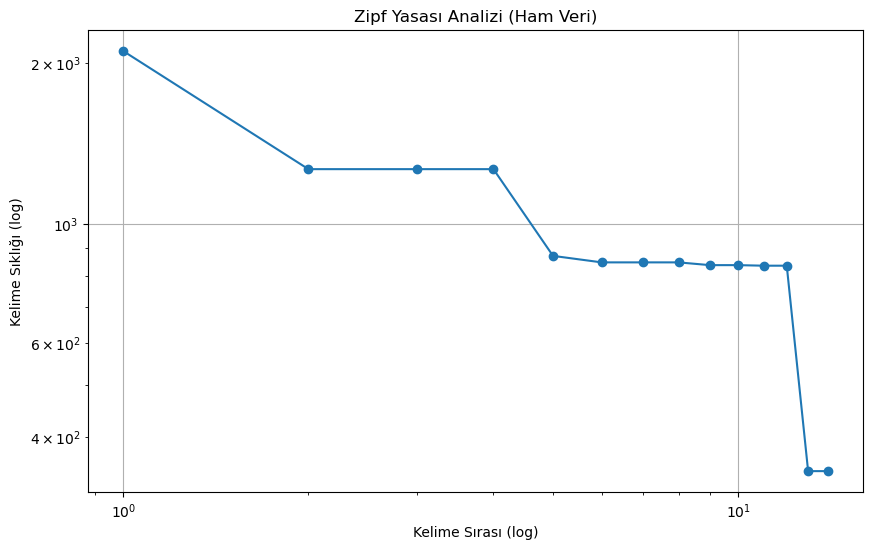

Toplam kelime sayısı: 13343
Farklı kelime sayısı: 14
Veri seti yeterli büyüklükte.


In [11]:
df = pd.read_csv("veri_5k.csv", header=None, names=["review"])
zipf_analysis(df["review"])